# Open Data Example #1: City of Chicago Salaries

_Source for Data Set:_ City of Chicago Department of Human Resources

_URL for Data Set:_ https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w

_Description of Data Set:_ "This dataset is a listing of all current City of Chicago employees, complete with full names, departments, positions, and annual salaries. For hourly employees the annual salary is estimated." (Description written by City of Chicago) 

_File Format for Data Set:_ CSV file (Comma Separated Values)

_Age of Data Set:_ Last updated January 30, 2018

### Import CSV File

In [1]:
# Import pandas module
import pandas as pd

# Read in the csv file (comma separated values)
salary_DF = pd.read_csv("Salaries 2020.csv")

# Print the last three entries of the file
    # The last line of a cell will print automatically!
    # Can sometimes display data differently
salary_DF[:3]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0


Sometimes, the last entry (or the last few entries) in a dataset may be erroneous. Use code similar to below to eliminate them.

salary_DF = salary_DF.drop(salary_DF.index[-1])

### Question: How many employees are paid by the City of Chicago?

In [2]:
# Print the length of the data fram
len(salary_DF)

33702

### Modify Data: Create a List of Salaries

In [3]:
# Store all values from the "Annual Salary" column
salary_list = salary_DF["Annual Salary"]

# Print the first 3 entries
salary_list[:3]

0    72510.0
1    93354.0
2        NaN
Name: Annual Salary, dtype: float64

### Modify Data to be Usable

Step 1: Clean data by deleting dollar signs, '$', from the salaries and replace any empty strings with a salary of '0.00' dollars per year.

Step 2: Create a list with only salaries, converted from strings to floating point numbers. For example, the string '84450.0' becomes the floating point number 84450.0.

In [4]:
# Delete '$'
# salary_list = salay_list.str.replace("$", "")

# Convert to floating point number
    # Empty cells --> 0.00
# salary_list = salary_list.astype(float)


# Print the last 4 entries


It might come in handy later to have our salaries as floating point numbers. Let's replace the old column in our dataframe (string data) and replace it with our new one (floating point numbers):

In [5]:
# Delete the data in "Annual Salary" column
del salary_DF["Annual Salary"]

# Replace with new data
salary_DF["Annual Salary"] = salary_list

# Print first 10 entries
salary_DF[:10]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,NaN,72510.0
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,NaN,93354.0
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,13.00,NaN
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,NaN,132972.0
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,NaN,90024.0
5,"AGNEW, ANTONIO E",MOTOR TRUCK DRIVER,AVIATION,F,Hourly,40.0,37.45,NaN
6,"AGNEW, MELISSA M",SERGEANT,POLICE,F,Salary,NaN,NaN,111444.0
7,"AGOSTA, JOSEPH J",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,NaN,103932.0
8,"AGOSTINELLI, MICHAEL A",FIREFIGHTER (PER ARBITRATORS AWARD)-EMT,FIRE,F,Salary,NaN,NaN,107106.0
9,"AGOSTINI, LUIS R",ASST DIR,POLICE,F,Salary,NaN,NaN,95736.0


### Modify Data: Convert to a Numpy Number Array

In [6]:
# Import numpy
import numpy as np

# Convert data to a numpy array
salary_array = np.array(salary_list)

# Print the last 30 values
salary_array[-30:]

array([    nan,  80016.,  84054.,  93354.,     nan,  92274.,     nan,
       114324.,  84054.,     nan,  89772.,  96060.,     nan,  96096.,
        84054.,  85704.,     nan,  90024., 117996.,  72510.,  80016.,
        87006.,  72510.,  80016.,  80016.,  72510.,  76266.,  90024.,
        93354., 126732.])

Look closely at this output, and you'll spot a problem: 

Some of our values are listed as "nan" or "not a number." If we are going to do some mathematical calculations with this data, we're going to need to clean the data by removing all instances of "nan." 

_Note: There may be several reasons why the dataset contains "nan" values. In some cases, an employee's salary data might be missing, there may have been a data entry error, an employee may have gone unpaid for a year because of an extended leave, or the employee may be working on a volunteer basis. Since there's no way to know how to interpret these values, it is best for us to do some data cleaning and remove them._ 

In [7]:
# Import numpy as np
import numpy as np

# Eliminate the NaN entries
    # the ~ symbol is interpreted by numpy as "not"
salary_array = salary_array[~np.isnan(salary_array)]

# Print the last 30 entries
salary_array[-30:]

array([ 76266.,  68616.,  72510.,  90024.,  90024.,  84054.,  80016.,
        84054.,  93354.,  92274., 114324.,  84054.,  89772.,  96060.,
        96096.,  84054.,  85704.,  90024., 117996.,  72510.,  80016.,
        87006.,  72510.,  80016.,  80016.,  72510.,  76266.,  90024.,
        93354., 126732.])

### Question: What is the average salary for city employees?

In [8]:
# Calculate the average
average = np.average(salary_array)
average

89061.79499999998

### Question: What is the median salary for city employees?

In [9]:
# Find the median value
median = np.median(salary_array)
median

90024.0

### Question: What is the number of city employees?

In [10]:
# Find the size length of the array
len(salary_array)

25528

### Question: What is the standard deviation of city employee salaries?

In [11]:
# Find the standard deviation
standard_dev = np.std(salary_array)
standard_dev

21131.627504523196

### Question: What is the highest salary among city employees?

In [12]:
# Find the max value
highest = np.amax(salary_array)
highest

275004.0

### Question: The highest paid employee of the City of Chicago makes $300,000 a year. Who is it?

In [13]:
# Sort the array in ascending order
sorted_DF = salary_DF.sort_values("Annual Salary", ascending=0)

# Print first entry only
sorted_DF[:1]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
24966,"RHEE, JAMIE L",COMMISSIONER OF AVIATION,AVIATION,F,Salary,NaN,NaN,275004.0


### Question: Who earns the top 10 salaries in the City of Chicago?

In [14]:
# Print the first 10 entries of the sorted array
sorted_DF[:10]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
24966,"RHEE, JAMIE L",COMMISSIONER OF AVIATION,AVIATION,F,Salary,NaN,NaN,275004.0
1902,"BECK, CHARLES L",SUPERINTENDENT OF POLICE,POLICE,F,Salary,NaN,NaN,260004.0
9339,"FORD II, RICHARD C",FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,217728.0
16968,"LIGHTFOOT, LORI E",MAYOR,MAYOR'S OFFICE,F,Salary,NaN,NaN,216210.0
21142,"NANCE HOLT, ANNETTE M",FIRST DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,197736.0
24987,"RICCIO, ANTHONY J",FIRST DEPUTY SUPERINTENDENT,POLICE,F,Salary,NaN,NaN,197724.0
5194,"CLASSEN, MAURICE A",CHIEF OF STAFF,MAYOR'S OFFICE,F,Salary,NaN,NaN,195000.0
2212,"BIAGI, GIA T",COMMISSIONER OF TRANSPORTATION,TRANSPORTN,F,Salary,NaN,NaN,195000.0
12444,"HELMOLD, BRIAN",DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,187680.0
26152,"ROY, CHARLES R",DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,NaN,187680.0


### Visualization: Histogram of Salaries

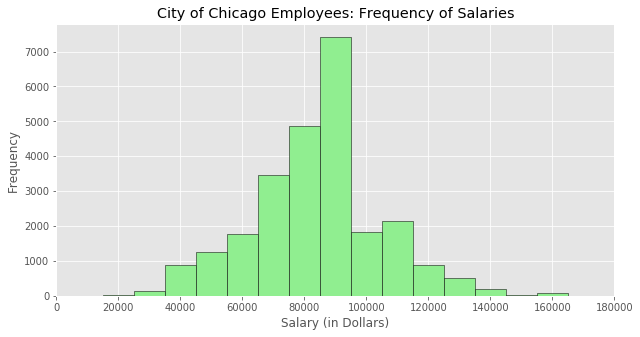

In [15]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create bins array
bins = []
for i in range(18):
    bin = i * 10000
    bins.append(bin)
    
# Graph style
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.xlim([0,180000])

# Create title and lables
plot.title("City of Chicago Employees: Frequency of Salaries")
plot.xlabel("Salary (in Dollars)")
plot.ylabel("Frequency")

# Create histogram
plot.hist(salary_array, bins, align="left", color="lightgreen", edgecolor="black")
plot.show()

### Question: How many employees per department in the City of Chicago?

In [16]:
# Count the number of entries from each department
department_freq = salary_DF["Department"].value_counts()
department_freq

POLICE                 13848
FIRE                    4627
STREETS & SAN           2175
WATER MGMNT             1914
AVIATION                1856
OEMC                    1737
TRANSPORTN              1113
PUBLIC LIBRARY          1088
DAIS                    1033
FAMILY & SUPPORT         656
FINANCE                  544
HEALTH                   467
LAW                      398
CITY COUNCIL             362
BUILDINGS                258
PUBLIC SAFETY ADMIN      244
BUSINESS AFFAIRS         167
HOUSING & ECON DEV       154
COPA                     123
BOARD OF ELECTION        111
MAYOR'S OFFICE           104
INSPECTOR GEN             95
CITY CLERK                88
PROCUREMENT               84
HUMAN RESOURCES           75
ANIMAL CONTRL             75
CULTURAL AFFAIRS          74
HOUSING                   66
BUDGET & MGMT             44
ADMIN HEARNG              38
DISABILITIES              28
TREASURER                 28
HUMAN RELATIONS           17
BOARD OF ETHICS            8
POLICE BOARD  

### Modify Data: Create a List of Departments and a List of Their Frequences

These two lists will be useful when plotting.

In [17]:
# Create department names list
department_names = department_freq.index.tolist()

# Create frequency list
department_count = department_freq.tolist()

# Print
print(department_names)
print(department_count)


['POLICE', 'FIRE', 'STREETS & SAN', 'WATER MGMNT', 'AVIATION', 'OEMC', 'TRANSPORTN', 'PUBLIC LIBRARY', 'DAIS', 'FAMILY & SUPPORT', 'FINANCE', 'HEALTH', 'LAW', 'CITY COUNCIL', 'BUILDINGS', 'PUBLIC SAFETY ADMIN', 'BUSINESS AFFAIRS', 'HOUSING & ECON DEV', 'COPA', 'BOARD OF ELECTION', "MAYOR'S OFFICE", 'INSPECTOR GEN', 'CITY CLERK', 'PROCUREMENT', 'HUMAN RESOURCES', 'ANIMAL CONTRL', 'CULTURAL AFFAIRS', 'HOUSING', 'BUDGET & MGMT', 'ADMIN HEARNG', 'DISABILITIES', 'TREASURER', 'HUMAN RELATIONS', 'BOARD OF ETHICS', 'POLICE BOARD', 'LICENSE APPL COMM']
[13848, 4627, 2175, 1914, 1856, 1737, 1113, 1088, 1033, 656, 544, 467, 398, 362, 258, 244, 167, 154, 123, 111, 104, 95, 88, 84, 75, 75, 74, 66, 44, 38, 28, 28, 17, 8, 2, 1]


### Visualization: Pie Chart of Employees by Department

Note: This pie chart has too many slices! We will need to fix it:

<function matplotlib.pyplot.show(*args, **kw)>

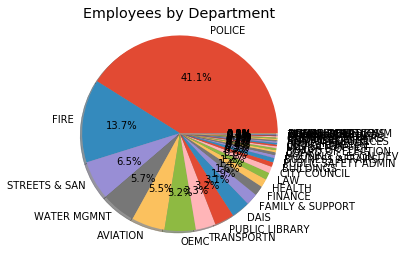

In [18]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create labels and data array
labels = department_names
data = department_count

# Graph pie chart
plot.pie(data, labels=labels, autopct="%1.1f%%", shadow=True)
plot.title("Employees by Department")
#plot.legend(title="Legend", loc="lower left")
plot.axis("equal")
plot.show

### Modify Data: If a Department is Not In the Top 10, Lump as 'Other'

In [19]:
# Make new list of largest 10 names, add "OTHER"
shortened_names = department_names[:10]
shortened_names.append("OTHER")

# Make new list of largets 10 counts, add sum of remaining
shortened_counts = department_count[:10]
remaining = sum(department_count[10:])
shortened_counts.append(remaining)

# Print two lists
print(shortened_names)
print(shortened_counts)

['POLICE', 'FIRE', 'STREETS & SAN', 'WATER MGMNT', 'AVIATION', 'OEMC', 'TRANSPORTN', 'PUBLIC LIBRARY', 'DAIS', 'FAMILY & SUPPORT', 'OTHER']
[13848, 4627, 2175, 1914, 1856, 1737, 1113, 1088, 1033, 656, 3655]


### Visualization: Pie Chart of Number of Employees by Department (Fixed)

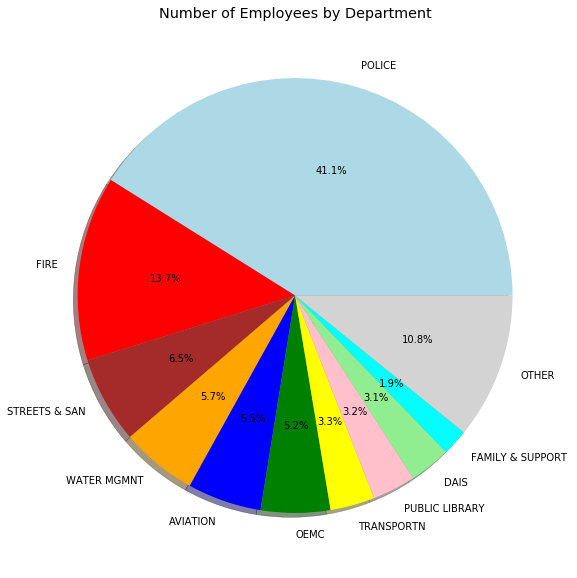

In [20]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(figsize=(10,10))
plot.title("Number of Employees by Department")
plot.style.use("ggplot")
colors_array = ["lightblue", "red", "brown", "orange", "blue", "green", "yellow", "pink", "lightgreen", "cyan", "lightgray"]

# Create pie chart
    # plot.pie(data array, labels array, color array, percentages, shadow)
plot.pie(shortened_counts, labels=shortened_names, colors=colors_array, autopct="%1.1f%%", shadow=True)
#plot.legend(title="Legend), loc="lower_left")
plot.show()

### Question: What is the mean (average) salary in each department in the City of Chicago?

In [21]:
# Group each department
dept_salary_avg = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).mean()
dept_salary_avg

Department
ADMIN HEARNG            80429.368421
ANIMAL CONTRL           71333.904762
AVIATION                78736.342056
BOARD OF ELECTION       53915.315676
BOARD OF ETHICS         99795.000000
BUDGET & MGMT           98641.428571
BUILDINGS              106854.316744
BUSINESS AFFAIRS        84961.575000
CITY CLERK              74520.351818
CITY COUNCIL            71314.166667
COPA                    82272.682927
CULTURAL AFFAIRS        88910.625000
DAIS                    94257.264167
DISABILITIES            88932.444444
FAMILY & SUPPORT        84472.394649
FINANCE                 76588.304609
FIRE                    96514.640813
HEALTH                  90871.380645
HOUSING                 92063.909091
HOUSING & ECON DEV      89883.655629
HUMAN RELATIONS         94992.000000
HUMAN RESOURCES         85977.440000
INSPECTOR GEN           85603.578947
LAW                     93691.645714
LICENSE APPL COMM       93984.000000
MAYOR'S OFFICE         105504.137931
OEMC                    750

### Modify Data: Create a List of Departments and a List of Their Average Annual Salaries

These two lists will be useful when plotting.

In [22]:
# Array of department names sorted by the average salary
dept_names_average = dept_salary_avg.index.tolist()

# Array of salaries sorted by department
dept_avg = dept_salary_avg.tolist()

# Print the arrays
print(dept_names_average)
print(dept_avg)


['ADMIN HEARNG', 'ANIMAL CONTRL', 'AVIATION', 'BOARD OF ELECTION', 'BOARD OF ETHICS', 'BUDGET & MGMT', 'BUILDINGS', 'BUSINESS AFFAIRS', 'CITY CLERK', 'CITY COUNCIL', 'COPA', 'CULTURAL AFFAIRS', 'DAIS', 'DISABILITIES', 'FAMILY & SUPPORT', 'FINANCE', 'FIRE', 'HEALTH', 'HOUSING', 'HOUSING & ECON DEV', 'HUMAN RELATIONS', 'HUMAN RESOURCES', 'INSPECTOR GEN', 'LAW', 'LICENSE APPL COMM', "MAYOR'S OFFICE", 'OEMC', 'POLICE', 'POLICE BOARD', 'PROCUREMENT', 'PUBLIC LIBRARY', 'PUBLIC SAFETY ADMIN', 'STREETS & SAN', 'TRANSPORTN', 'TREASURER', 'WATER MGMNT']
[80429.36842105263, 71333.90476190476, 78736.34205607476, 53915.31567567567, 99795.0, 98641.42857142857, 106854.31674418596, 84961.575, 74520.35181818182, 71314.16666666667, 82272.68292682926, 88910.625, 94257.26416666668, 88932.44444444444, 84472.39464882943, 76588.30460921844, 96514.64081262155, 90871.38064516129, 92063.90909090909, 89883.65562913907, 94992.0, 85977.44, 85603.57894736843, 93691.64571428571, 93984.0, 105504.13793103448, 75097.42

### Visualization: Bar Chart of Average Annual Salary by Department
#### Sorted by Departement Name

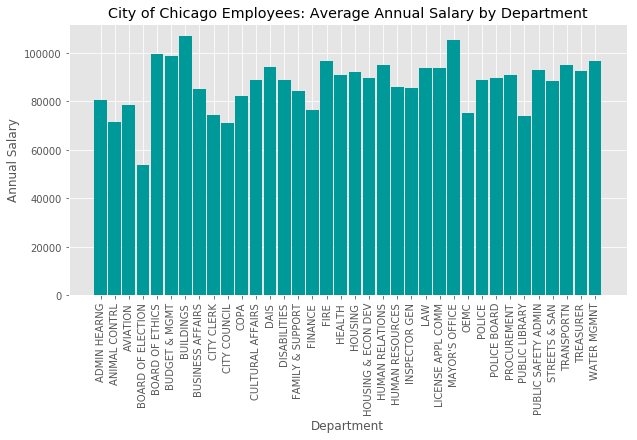

In [23]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.title("City of Chicago Employees: Average Annual Salary by Department")
plot.xlabel("Department")
plot.ylabel("Annual Salary")

length = len(dept_names_average)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, dept_names_average, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, dept_avg, width, color="#009999")
plot.show()

### Modify Data: Merge Our Two Lists Into a List of Tuples, Then Sort

By sorting, we can get a nicer plot.

In [24]:
# List of tuples in the form (names, average salary)
sorted_average_list = []
for i in range(len(dept_names_average)):
    sorted_average_list.append((dept_names_average[i], dept_avg[i]))



# Sort the list in reverse
sorted_average_list.sort(key = lambda x: x[1], reverse=True)

# Print
sorted_average_list

[('BUILDINGS', 106854.31674418596),
 ("MAYOR'S OFFICE", 105504.13793103448),
 ('BOARD OF ETHICS', 99795.0),
 ('BUDGET & MGMT', 98641.42857142857),
 ('WATER MGMNT', 96675.19955056185),
 ('FIRE', 96514.64081262155),
 ('TRANSPORTN', 95221.89860465114),
 ('HUMAN RELATIONS', 94992.0),
 ('DAIS', 94257.26416666668),
 ('LICENSE APPL COMM', 93984.0),
 ('LAW', 93691.64571428571),
 ('PUBLIC SAFETY ADMIN', 93074.28673469387),
 ('TREASURER', 92611.60714285714),
 ('HOUSING', 92063.90909090909),
 ('PROCUREMENT', 90967.17073170732),
 ('HEALTH', 90871.38064516129),
 ('HOUSING & ECON DEV', 89883.65562913907),
 ('POLICE BOARD', 89784.0),
 ('DISABILITIES', 88932.44444444444),
 ('CULTURAL AFFAIRS', 88910.625),
 ('POLICE', 88834.11892361111),
 ('STREETS & SAN', 88508.8632218845),
 ('HUMAN RESOURCES', 85977.44),
 ('INSPECTOR GEN', 85603.57894736843),
 ('BUSINESS AFFAIRS', 84961.575),
 ('FAMILY & SUPPORT', 84472.39464882943),
 ('COPA', 82272.68292682926),
 ('ADMIN HEARNG', 80429.36842105263),
 ('AVIATION', 78

### Visualization: Another Bar Chart of Average Annual Salary by Department 

#### Sorted by Average Annual Salary

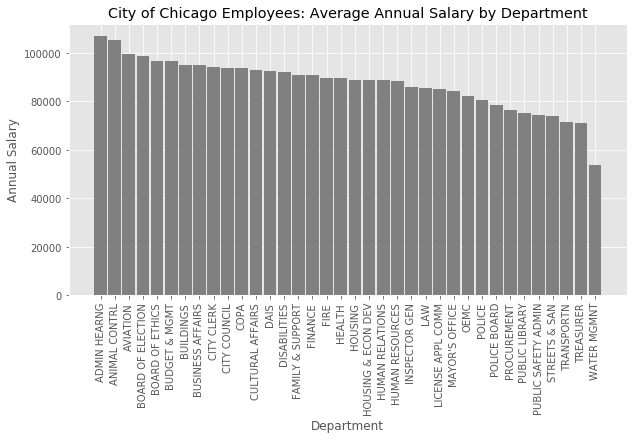

In [25]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('City of Chicago Employees: Average Annual Salary by Department')
plot.ylabel('Annual Salary')
plot.xlabel('Department')

x_data = [tuple[0] for tuple in sorted_average_list]
y_data = [tuple[1] for tuple in sorted_average_list]

length = len(sorted_average_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, dept_names_average, rotation=90)
width = 0.9

plot.bar(bar_pos, y_data, width, color="gray")
plot.show()


### Question: What is the total salary expenditure in each department in the City of Chicago?

In [27]:
# List of each departments total salary spending
dept_salary_sum = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).sum()
dept_salary_sum

Department
ADMIN HEARNG           3.056316e+06
ANIMAL CONTRL          4.494036e+06
AVIATION               5.054873e+07
BOARD OF ELECTION      5.984600e+06
BOARD OF ETHICS        7.983600e+05
BUDGET & MGMT          4.142940e+06
BUILDINGS              2.756841e+07
BUSINESS AFFAIRS       1.359385e+07
CITY CLERK             6.557791e+06
CITY COUNCIL           2.053848e+07
COPA                   1.011954e+07
CULTURAL AFFAIRS       5.690280e+06
DAIS                   2.714609e+07
DISABILITIES           2.401176e+06
FAMILY & SUPPORT       2.525725e+07
FINANCE                3.821756e+07
FIRE                   4.465732e+08
HEALTH                 4.225519e+07
HOUSING                6.076218e+06
HOUSING & ECON DEV     1.357243e+07
HUMAN RELATIONS        1.614864e+06
HUMAN RESOURCES        6.448308e+06
INSPECTOR GEN          8.132340e+06
LAW                    3.279208e+07
LICENSE APPL COMM      9.398400e+04
MAYOR'S OFFICE         9.178860e+06
OEMC                   4.956430e+07
POLICE           

### Modify Data: Create a Sorted List of Tuples

In [28]:
# List of department names
department_names_sum = dept_salary_sum.index.tolist()

# List of department total salary spending
department_sum = dept_salary_sum.tolist()

# Create list a tuples in form (department name, department total salary spending)
    # 'zip' binds two parallel arrays into tuples
sorted_sum_list = list(zip(department_names_sum, department_sum))

# Sort the list by total sums, in reverse
sorted_sum_list.sort(key = lambda x: x[1], reverse=True)

# Print
sorted_sum_list

[('POLICE', 1228042860.0),
 ('FIRE', 446573243.03999996),
 ('PUBLIC LIBRARY', 54248184.0),
 ('AVIATION', 50548731.6),
 ('OEMC', 49564300.32),
 ('HEALTH', 42255192.0),
 ('FINANCE', 38217564.0),
 ('TRANSPORTN', 36850874.75999999),
 ('WATER MGMNT', 34416371.04000002),
 ('LAW', 32792076.0),
 ('STREETS & SAN', 29119416.0),
 ('BUILDINGS', 27568413.719999976),
 ('DAIS', 27146092.080000002),
 ('FAMILY & SUPPORT', 25257246.0),
 ('CITY COUNCIL', 20538480.0),
 ('PUBLIC SAFETY ADMIN', 18242560.2),
 ('BUSINESS AFFAIRS', 13593852.0),
 ('HOUSING & ECON DEV', 13572432.0),
 ('COPA', 10119540.0),
 ("MAYOR'S OFFICE", 9178860.0),
 ('INSPECTOR GEN', 8132340.0),
 ('PROCUREMENT', 7459308.0),
 ('CITY CLERK', 6557790.96),
 ('HUMAN RESOURCES', 6448308.0),
 ('HOUSING', 6076218.0),
 ('BOARD OF ELECTION', 5984600.04),
 ('CULTURAL AFFAIRS', 5690280.0),
 ('ANIMAL CONTRL', 4494036.0),
 ('BUDGET & MGMT', 4142940.0),
 ('ADMIN HEARNG', 3056316.0),
 ('TREASURER', 2593125.0),
 ('DISABILITIES', 2401176.0),
 ('HUMAN RELATIO

### Visualization: Bar Chart of Total Annual Salary Expenditure by Department 

#### Sorted by Total Expenditure
* y-axis expressed in billions of dollars (1 x 10^9 or 1e9)

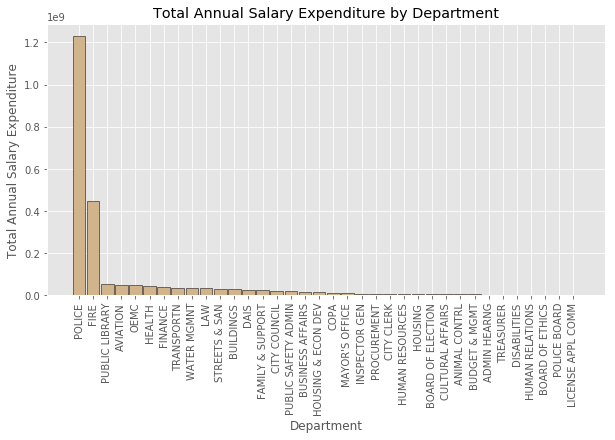

In [30]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Total Annual Salary Expenditure by Department')
plot.ylabel('Total Annual Salary Expenditure')
plot.xlabel('Department')

# Create lists of sorted departements and total sums
x_data = [tuple[0] for tuple in sorted_sum_list]
y_data = [tuple[1] for tuple in sorted_sum_list]

length = len(sorted_sum_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, x_data, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, y_data, width, color="tan", edgecolor="black")

plot.show()

# Open Data Example #2: School District Revenue and Enrollment

_Source for Data Set:_ The United States Census Bureau (via data.gov)

_URL for Data Set:_ https://www.census.gov/data/tables/2015/econ/school-finances/secondary-education-finance.html

_Note:_ You should get this dataset from Schoology, not the URL. The Schoology file has been cleaned to remove outliers (for example, districts with 0 students or 0 revenue).

_Description of Data Set:_ This data has school enrollment versus total revenue for every school district in the United States in 2015 (the most recent data available).

_File Format for Data Set:_ CSV file (Comma Separated Values)

_Age of Data Set:_ 5/11/2017, accessed 1/28/2018

Read in the data:

In [32]:
# Import pandas
import pandas as pd

# Read the csv file (comma separated values)
enrollment_DF = pd.read_csv("Enrollment Revenue 2015.csv")

# Print last thre entries
enrollment_DF[-3:]

,District,Total Enrollment,Total Revenue
13271,ZIONSVILLE COMMUNITY SCHOOLS,6428,83094
13272,ZUMBROTA-MAZEPPA SCH DISTRICT 2805,1152,14074
13273,ZUNI SCHOOL DISTRICT,1390,20243


Now plot:

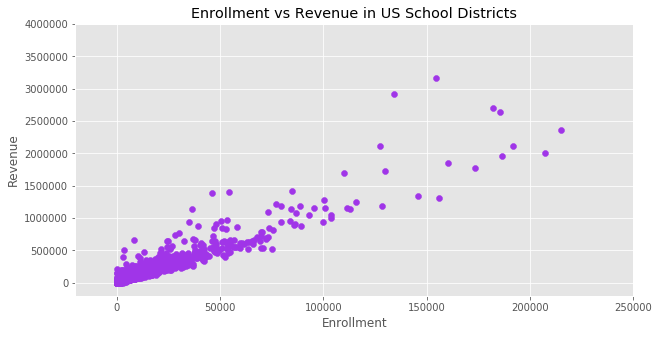

In [33]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

#enrollmentDF.plot(kind='scatter', x='Enrollment', y='Total Revenue');

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment_DF["Total Enrollment"]
y_data = enrollment_DF["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Scatter plot
plot.scatter(x_data, y_data, color="#A035E8")

plot.show()

### Question: What seems to be the relationship between the number of students enrolled in a school district and the revenue of the district?

### Linear Regression
* Modeling the relationship between two variables using a linear equation (straight line)
* Equation for a line in slope-intercept form:
    * y = mx + b
        * m = slope
        * b = y-intercept

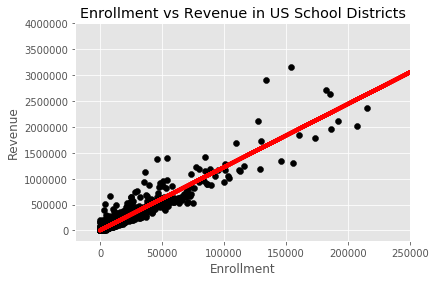

In [40]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment_DF["Total Enrollment"]
y_data = enrollment_DF["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Use np.polyfit to calculate the slope and y-intercept for the 'line of best fit'
m, b = np.polyfit(x_data, y_data, 1)

# Scatter Plot
    # plot.plot(variable, equation, line width, color)
plot.plot(x_data, m*x_data + b, linewidth=4, color="red")
plot.scatter(x_data, y_data, color="black")

plot.show()

### Question: Explain the meaning of the code in the cell below. Then run it and interpret the resulting output.

In [41]:
x0 = 125000
print(m*x0 + b)

1528065.6951490778
